<a href="https://colab.research.google.com/github/Matheusvfvitor/R/blob/master/Previs%C3%A3o_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agora que ja fizemos uma análise Exploratória vamos fazer uma análise preditiva para prevermos a quantidade de casos que teremos espalhados pelo mundo.

Para fazer isso vamos treinar o nosso algorítmo com os dados da China, local onde conseguiremos traçar uma curva para determinar o pico do Virus, sua possível estabilização e depois disso a queda de casos confirmados.

Para conseguirmos gerar uma função de Previsão vamos utilizar como base os pacientes infectados por milhão de habitantes.

Para isso precisaremos utilizar um novo Dataset que contem a população mundial de cada um dos países.

**Esse estudo representa cenários fictícios de caso a evolução do vírus se comporte da mesma maneira como foi na China, foram desconsiderados desse estudo aspectos como : políticas sanitárias, aspectos econômicos e sociais.**

In [0]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(stringr)

In [6]:

#Lendo os dados
smmy = read.csv("c19_data.csv")
pop = read.csv("pop2.csv")

#Organizando o dataset
c19 = smmy
c19$Province.State = NULL
c19$Lat = NULL
c19$Long = NULL
str(c19)

c19$Country.Region = as.character(c19$Country.Region)
c19[c19$Country.Region =="Mainland China",1] = "China"

c19 = c19 %>% group_by(Date,Country.Region) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered))

c19$Date = as.character(c19$Date)
c19$Date = as.Date(c19$Date,format = "%m/%d/%Y")

pop = read.csv("pop2.csv")

df_population = data.frame(pop$Country, pop$Population)

names(df_population)[1] = "Country"
names(df_population)[2] = "Population"

names(c19)[2]="Country"

'data.frame':	10350 obs. of  5 variables:
 $ Country.Region: Factor w/ 102 levels "Afghanistan",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Date          : Factor w/ 46 levels "1/22/20","1/23/20",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Confirmed     : int  1 14 6 1 0 26 2 1 4 1 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...


In [7]:
#Agora vamos criar um dataframe único com os dados da população de cada país.3

df_population$Country = as.character(df_population$Country)
c19$Country = as.character(c19$Country)

str(df_population)
str(c19)

c19 = c19 %>% mutate(Popoulation = 0)


df_population$Country = str_trim(df_population$Country)



for (i in 1:length(c19$Country)) {
  
    for(k in 1:length(df_population$Country)){
      
      if(c19[i,2] == df_population[k,1]){
        
        c19[i,6] = df_population[k,2]
        
      }
  }
  
}

c19 %>% filter(Popoulation == 0)

#Alguns Países estavam com os nomes diferentes , vamos acertar manualmente.

c19[c19$Country == "Bosnia and Herzegovina",6] = df_population[df_population$Country == 	"Bosnia & Herzegovina",2]
c19[c19$Country == "North Macedonia",6] = df_population[df_population$Country == 	"Macedonia",2]
c19[c19$Country == "Palestine",6] = 5052000
c19[c19$Country == "South Korea",6] = df_population[df_population$Country == 	"Korea, South",2]
c19[c19$Country == "UK",6] = df_population[df_population$Country == 	"United Kingdom",2]
c19[c19$Country == "US",6] = df_population[df_population$Country == 	"United States",2]
c19[c19$Country == "Vatican City",6] = 1000
c19[c19$Country == "Saint Barthelemy",6] = 9131

'data.frame':	227 obs. of  2 variables:
 $ Country   : chr  "Afghanistan " "Albania " "Algeria " "American Samoa " ...
 $ Population: int  31056997 3581655 32930091 57794 71201 12127071 13477 69108 39921833 2976372 ...
Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	4692 obs. of  5 variables:
 $ Date     : Date, format: "20-01-22" "20-01-22" ...
 $ Country  : chr  "Afghanistan" "Algeria" "Andorra" "Argentina" ...
 $ Confirmed: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered: int  0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "groups")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	46 obs. of  2 variables:
  ..$ Date : Factor w/ 46 levels "1/22/20","1/23/20",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..$ .rows:List of 46
  .. ..$ : int  1 2 3 4 5 6 7 8 9 10 ...
  .. ..$ : int  103 104 105 106 107 108 109 110 111 112 ...
  .. ..$ : int  205 206 207 208 209 210 211 212 213 214 ...
  .. ..$ : int  307 308 309 310 311 312 313 314 315 316 ...
  .. ..$ : int  409 410 411 412 

Date,Country,Confirmed,Deaths,Recovered,Popoulation
<date>,<chr>,<int>,<int>,<int>,<dbl>
20-01-22,Bosnia and Herzegovina,0,0,0,0
20-01-22,North Macedonia,0,0,0,0
20-01-22,Others,0,0,0,0
20-01-22,Palestine,0,0,0,0
20-01-22,Saint Barthelemy,0,0,0,0
20-01-22,South Korea,1,0,0,0
20-01-22,UK,0,0,0,0
20-01-22,US,1,0,0,0
20-01-22,Vatican City,0,0,0,0


In [8]:
c19

Date,Country,Confirmed,Deaths,Recovered,Popoulation
<date>,<chr>,<int>,<int>,<int>,<dbl>
20-01-22,Afghanistan,0,0,0,31056997
20-01-22,Algeria,0,0,0,32930091
20-01-22,Andorra,0,0,0,71201
20-01-22,Argentina,0,0,0,39921833
20-01-22,Armenia,0,0,0,2976372
20-01-22,Australia,0,0,0,20264082
20-01-22,Austria,0,0,0,8192880
20-01-22,Azerbaijan,0,0,0,7961619
20-01-22,Bahrain,0,0,0,698585


Abaixo está a curva qual precisamos encontrar a função, quando encontrarmos essa curva poderemos traçar um paralelo e prever a quantidade de casos no mundo quando tivermos o pico do vírus.

Date,Country,Confirmed,Deaths,Recovered,Popoulation
<date>,<chr>,<int>,<int>,<int>,<dbl>


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



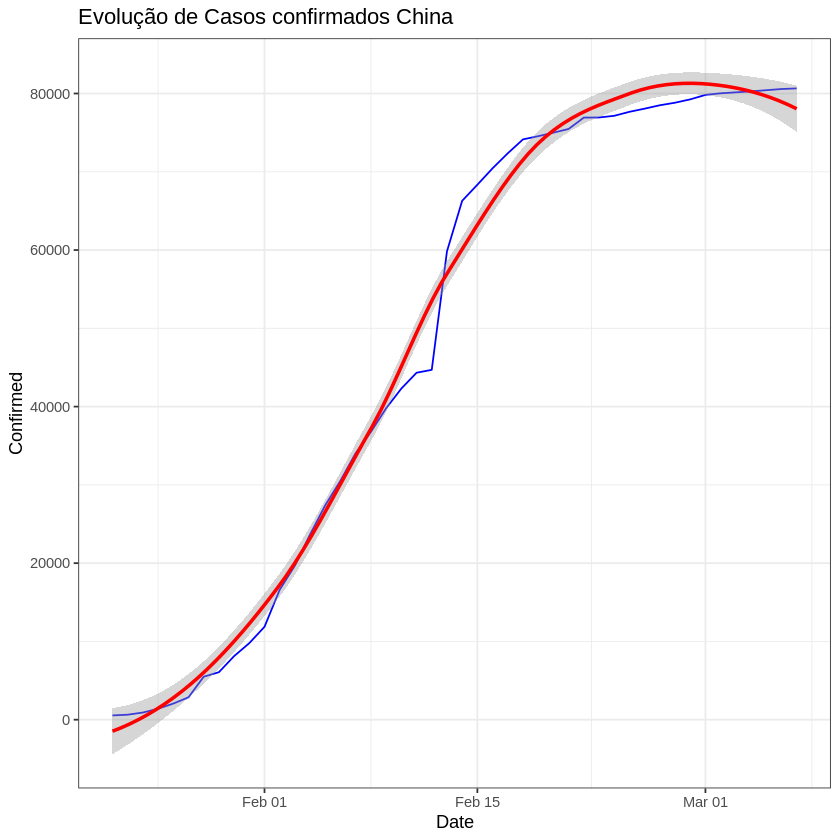

In [10]:
c19 %>% filter(Popoulation == 0)

c19 = c19 %>% filter(Popoulation != 0)

df_China = c19 %>% filter(Country == "China")
names(df_China)[1] = "Date"

ggplot(df_China, aes(x=Date, y = Confirmed, group = 1))+
  geom_line(color = "blue")+
  geom_smooth(color = "red")+
  theme_bw()+
  labs(title="Evolução de Casos confirmados China")

Para melhorarmos nossa análise vamos transformar a coluna Data em um Factor , com o número de dias.

O nosso objetivo é avaliar o pico apartir do dia 1, ou seja o dia em que foi detectado o primeiro caso

In [0]:
v = unique(df_China$Date)
v = as.vector(v)


df_China_outliers =  df_China

df_China_outliers$Date = as.factor(df_China_outliers$Date)
v = unique(df_China_outliers$Date)
v = as.vector(v)


df_China_outliers$Date = factor(df_China_outliers$Date, levels = v, labels = c(1:46))

Veja que após reagruparmos o dataset com os casos da China, percebemos diversos outliers em nosso gráfico.
Esses outliers são inconsistências dentro do dataset, que não fizeram diferença em nossa análise visto que os gráficos anteriores são gerados em função do tempo e a própria função ja otimiza esse tipo de erro

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



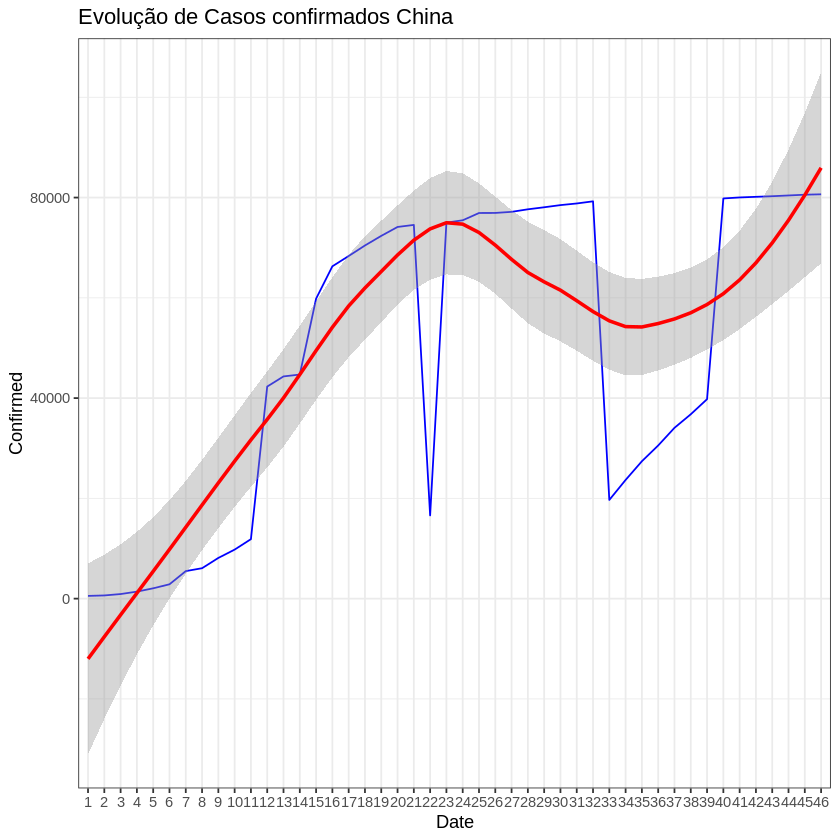

In [13]:
df_China_outliers$nDay = NULL
df_China_outliers$Confirmed2 = NULL
df_China_outliers$Country = NULL
pops = df_China_outliers[1,5]
df_China_outliers$Popoulation = NULL

ggplot(df_China_outliers, aes(x=Date, y = Confirmed, group = 1))+
  geom_line(color = "blue")+
  geom_smooth(color = "red")+
  theme_bw()+
  labs(title="Evolução de Casos confirmados China")

Após identificarmos os Outliers, podemos simplesmente deleta-los e posteriormente quando tivermos os dados da curva poderemos retorna-los ao data frame original, no nosso caso não será necessário.

Porém, na maioria dos casos os outliers precisam ser tratados com mais cuidados sendo substituídos através de técnicas estatísticas.

Veja como fica o gráfico após o tratamento dos Outliers. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



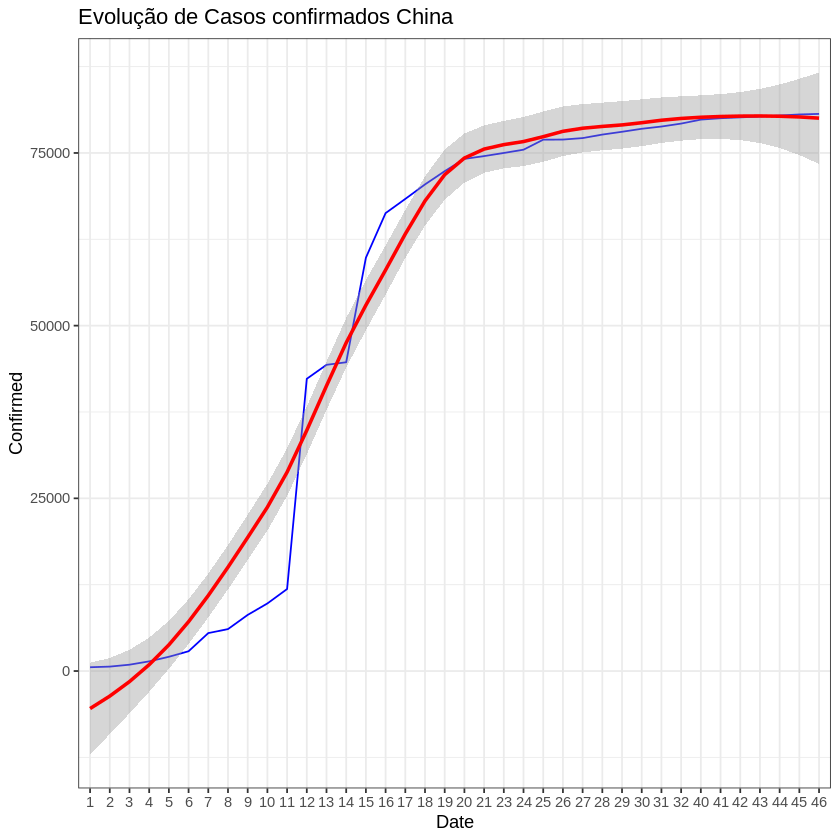

In [14]:
df_China_outliers = df_China_outliers %>% filter(Date != 22)
df_China_outliers = df_China_outliers %>% filter(Date != 33)
df_China_outliers = df_China_outliers %>% filter(Date != 34)
df_China_outliers = df_China_outliers %>% filter(Date != 35)
df_China_outliers = df_China_outliers %>% filter(Date != 36)
df_China_outliers = df_China_outliers %>% filter(Date != 37)
df_China_outliers = df_China_outliers %>% filter(Date != 38)
df_China_outliers = df_China_outliers %>% filter(Date != 39)


ggplot(df_China_outliers, aes(x=Date, y = Confirmed, group = 1))+
  geom_line(color = "blue")+
  geom_smooth(color = "red")+
  theme_bw()+
  labs(title="Evolução de Casos confirmados China")


Agora vamos criar as colunas ppm. , essas colunas representam a quantitade de casos por Milhão de habitante na china.

Para isso utilizaremos os dados da tabela Pops.

In [19]:
ppm = pops / 1000000 
ppm = as.numeric(ppm)
df = data.frame(c(1:38),ppm)

test = df_China_outliers %>% mutate(ppm_Confirmed = Confirmed /ppm)
test = test %>% mutate(ppm_Deaths = Deaths /ppm)
test = test %>% mutate(ppm_Recovered = Deaths /ppm)

data = test

head(data)

Date,Confirmed,Deaths,Recovered,ppm_Confirmed,ppm_Deaths,ppm_Recovered
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,547,17,28,0.4162945,0.01293785,0.01293785
2,639,18,30,0.4863111,0.01369890,0.01369890
3,916,26,36,0.6971220,0.01978731,0.01978731
4,1399,42,39,1.0647093,0.03196411,0.03196411
5,2062,56,49,1.5692856,0.04261881,0.04261881
6,2863,82,58,2.1788868,0.06240612,0.06240612


Chegou a hora de utilizarmos técnicas de Regressão Polinomial para gerarmos as previsões.

Com isso definiremos qual a equação da curva da evolução de casos do Covid19 e projetar essa evolução para os casos do resto do mundo em uma função f(x,y) do tipo = dias após primeiro caso x número de casos.

Primeiramente vamos fazer uma curva dos dados Confirmados.

Avaliando os gráficos de evolução dos casos na China pudemos perceber que se aproxima de uma equação polinomial com quatro expoentes, então precisaremos ajustar nosso Data Frame , e elevar nossa coluna preditora com esse número de expoentes.


**Premissas assumidas**

Faremos a previsão somente sobre a influência do Tempo (nDias após o primeiro Caso) com o número de casos e casos por milhão de habitantes desta forma, não levaremos em consideração aspectos econômicos, sociais e culturais.

In [25]:
#Regressão Polinomial

data = test
data$Date = as.numeric(data$Date)

data$Date2 = data$Date^2
data$Date3 = data$Date^3
data$Date4 = data$Date^4
data$Date5 = data$Date^5

reg = lm(formula = Confirmed ~ Date + Date2 + Date3 + Date4 + Date5,data = data)
summary(reg)

prev  = predict(reg, newdata = data[-2])

length(prev)
length(data$Confirmed)


Call:
lm(formula = Confirmed ~ Date + Date2 + Date3 + Date4 + Date5, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16218.3  -2367.9    250.4   3070.3   7864.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.850e+04  5.785e+03   3.198  0.00312 ** 
Date        -1.315e+04  2.419e+03  -5.434 5.63e-06 ***
Date2        2.255e+03  3.125e+02   7.217 3.39e-08 ***
Date3       -1.127e+02  1.670e+01  -6.749 1.26e-07 ***
Date4        2.330e+00  3.909e-01   5.962 1.21e-06 ***
Date5       -1.734e-02  3.325e-03  -5.216 1.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5278 on 32 degrees of freedom
Multiple R-squared:  0.9774,	Adjusted R-squared:  0.9739 
F-statistic:   277 on 5 and 32 DF,  p-value: < 2.2e-16


[1] 38

[1] 38

Pronto Curva de Previsão gerada, agora vamos plotar a curva Real (Azul) e a Curva de Aprendizagem (Vermelha) para verificar a aderência

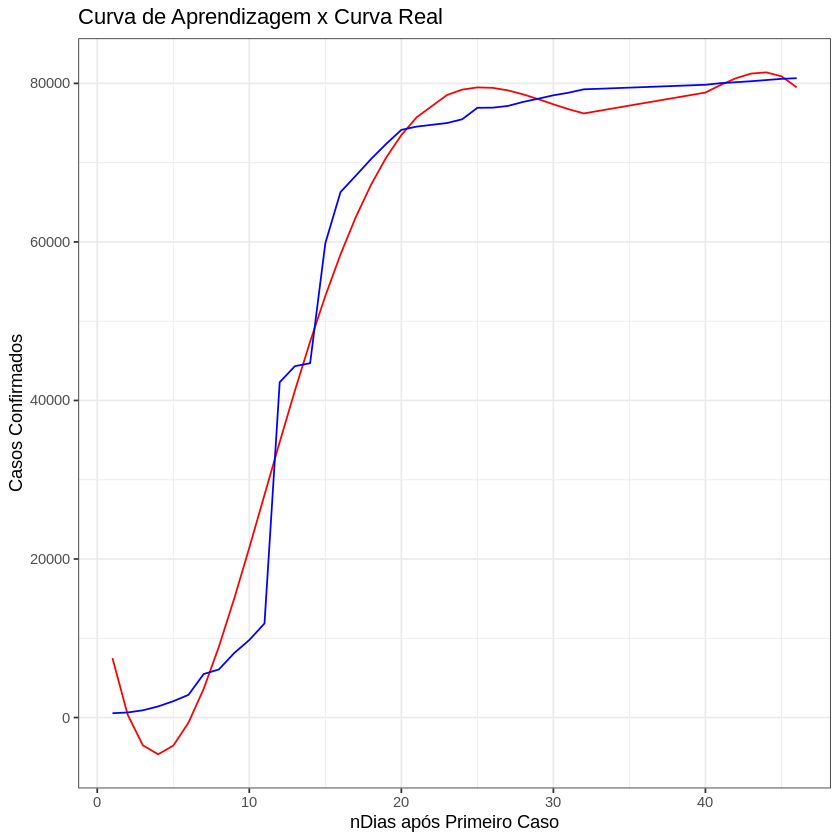

In [27]:
Res = data.frame(data$Date,prev)
ggplot()+
  geom_line(Res,mapping = aes(x=data.Date, y = prev),color = "red")+
  geom_line(data, mapping = aes(x= Date, y = Confirmed), color = "blue")+
  labs(title="Curva de Aprendizagem x Curva Real", x = "nDias após Primeiro Caso", y = "Casos Confirmados")+
  theme_bw()

Agora vamos fazer a mesma coisa para Casos Confirmados por Milhão de Habitantes, o resutaldo deverá ser o mesmo visto que as colunas são proporciais.


Call:
lm(formula = Confirmed ~ Date + Date2 + Date3 + Date4 + Date5, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16218.3  -2367.9    250.4   3070.3   7864.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.850e+04  5.785e+03   3.198  0.00312 ** 
Date        -1.315e+04  2.419e+03  -5.434 5.63e-06 ***
Date2        2.255e+03  3.125e+02   7.217 3.39e-08 ***
Date3       -1.127e+02  1.670e+01  -6.749 1.26e-07 ***
Date4        2.330e+00  3.909e-01   5.962 1.21e-06 ***
Date5       -1.734e-02  3.325e-03  -5.216 1.06e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5278 on 32 degrees of freedom
Multiple R-squared:  0.9774,	Adjusted R-squared:  0.9739 
F-statistic:   277 on 5 and 32 DF,  p-value: < 2.2e-16


[1] 38

[1] 38

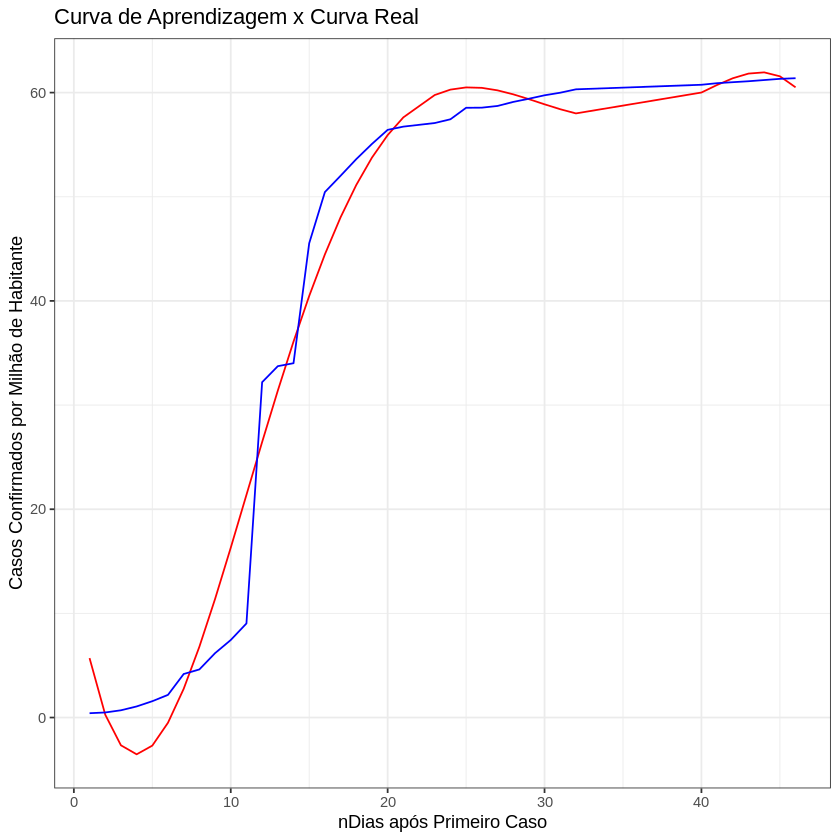

In [28]:
#Previsao ppm
reg2 = lm(formula = ppm_Confirmed ~ Date + Date2 + Date3 + Date4 + Date5,data = data)
summary(reg)

prev  = predict(reg2, newdata = data[-2])

length(prev)
length(data$Confirmed)

Res = data.frame(data$Date,prev)

ggplot()+
  geom_line(Res,mapping = aes(x=data.Date, y = prev),color = "red")+
  geom_line(data, mapping = aes(x= Date, y = ppm_Confirmed), color = "blue")+
  labs(title="Curva de Aprendizagem x Curva Real", x = "nDias após Primeiro Caso", y = "Casos Confirmados por Milhão de Habitante")+
  theme_bw()


Agora que ja sabemos as curvas vamos gerar um vetor com as datas para verificarmos a evolução nos 54 dias após o dia 1.

Depois vamos multiplicar o ppm pela quantidade de habitantes.
Considerando que a quantidade de habitantes mundial é de 7,7 Bilhões de pessoas.


[1] 481293.7
[1] "Máximo de Casos no Brasil =  11650.046653476"
[1] "Máximo de Casos no Mundo =  481293.682641472"


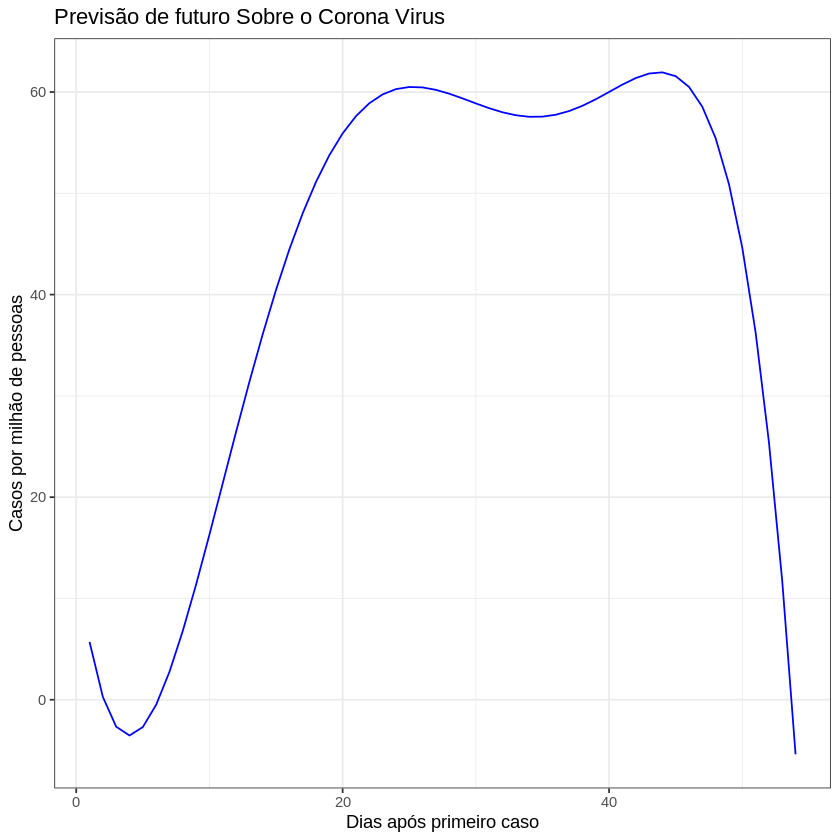

In [52]:
ft = c()
for(i in 1:54){
  
  Date = c(i)
  Date2 = c(i^2)
  Date3 = c(i^3)
  Date4 = c(i^4)
  Date5 = c(i^5)
  
  df_ft = data.frame(Date, Date2, Date3, Date4, Date5)
  ft_prev = predict(reg2, newdata = df_ft) 
  
  ft = c(ft,ft_prev)
  
}

day = c(1:54)
future = data.frame(day,ft)

maxCases = max(future$ft)

ggplot(future, aes(x = day, y = ft ))+
  geom_line(color = "blue")+
  theme_bw()+
  labs(title= "Previsão de futuro Sobre o Corona Virus",y = "Casos por milhão de pessoas" , x="Dias após primeiro caso")


popMundial = 7770
totCases  =  popMundial*maxCases

print(totCases)

popBrasil = pop[pop$Country == "Brazil ", 3]

popBrasil = popBrasil/1000000


totCasesBR  =  popBrasil*maxCases

print(paste("Máximo de Casos no Brasil = " ,totCasesBR))
print(paste("Máximo de Casos no Mundo = " ,totCases))

print("Após 54 dias do primeiro caso o número de pacientes confirmados deve se aproximar de 0")

Como pudemos ver na análise acima, o comportamento existe uma tendência de após o 40º dia de contaminação os casos caiam drásticamente e chegem a zerar próximo 50º dia.

Então, 
Vamos seguir as medidas protetivas como :

Evitar Multidões, Lavar Sempre as mãos com água e sabão e Fazer uso contínuo do alcool em gel.